<a href="https://colab.research.google.com/github/Krish-mal15/Brain-Tumor-Segmentation-IGRT-Algorithms/blob/main/Glioma_Grade_Classifier_Slice2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator


train_path = '/content/output_imgs/Training'
val_path = '/content/output_imgs/Validation'

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

model.summary()

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    val_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

model.fit(train_generator, epochs=30, validation_data=validation_generator)

model.save('glioma-grade.keras')



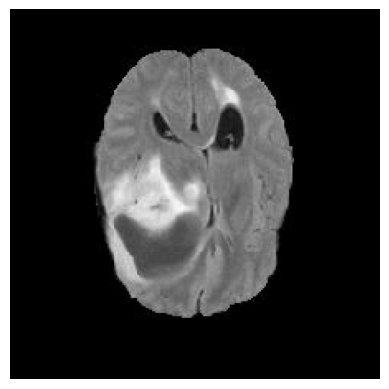

1/1 [==============================] - 0s 93ms/step
Prediction:  [[0.9898059]]
Low Grade Glioma


In [17]:
import keras
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import cv2

model = keras.models.load_model('glioma-grade.keras')

testH = '/content/output_imgs/Validation/High Grade Glioma/BraTS20_Training_057/BraTS20_Training_057_flair_slice_69.jpg'
testG = '/content/output_imgs/Validation/Low Grade Glioma/BraTS20_Training_318/BraTS20_Training_318_flair_slice_69.jpg'


def load_image(img_path, show=True, predictions=''):

    img = image.load_img(img_path, target_size=(224, 224))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.

    if show:
        plt.imshow(img_tensor[0])
        plt.axis('off')
        plt.title(predictions)
        plt.show()

    return img_tensor

img_path = testG

new_image = load_image(img_path)

pred = model.predict(new_image)
print('Prediction: ', pred)


if pred[0][0] <= 0.5:
    print("High Grade Glioma")
else:
    print("Low Grade Glioma")

In [ ]:
!unzip '/content/output_imgs.zip'